# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_type = pyber_data_df.groupby(['type']).count()['ride_id']

city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type

total_drivers = city_data_df.groupby(['type']).sum()['driver_count']

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_data_df.groupby(['type']).sum()['fare']

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 

average_fare = total_fares / city_type 

average_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 

average_driver_fare = total_fares / total_drivers

average_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({'Total Rides': city_type,
             'Total Drivers': total_drivers,
             'Total Fares': total_fares,
             'Average Fare per Ride': average_fare,
             'Average Fare per Driver': average_driver_fare})

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  6. Create a PyBer summary DataFrame. 


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)

pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:.2f}'.format)

pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:.2f}'.format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [23]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare_date_df = pyber_data_df.groupby(['type','date']).sum().fare.to_frame()

fare_by_city_date_df = pyber_data_df.groupby(['type','date']).sum().fare.to_frame()


fare_date_df


fare
type  date                
Rural 1/1/19 9:45    43.69
      1/11/19 4:39   16.42
      1/14/19 15:58  54.10
      1/14/19 7:09   18.05
      1/15/19 21:44  30.26
...                    ...
Urban 5/8/19 1:54    32.69
      5/8/19 2:31    41.33
      5/8/19 4:20    21.99
      5/8/19 4:39    18.45
      5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

fare_by_city_date_df = fare_by_city_date_df.reset_index()

fare_by_city_date_df.head()


,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fare_by_city_date_df = fare_by_city_date_df.pivot(index='date', columns='type', values='fare')

fare_by_city_date_df.head()

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fare_date_df = fare_by_city_date_df.loc['1/1/2019':'4/29/2019']

fare_date_df

type,Rural,Suburban,Urban
date,,,
1/10/19 0:17,NaN,47.52,NaN
1/10/19 11:08,NaN,37.96,NaN
1/10/19 11:10,NaN,40.20,NaN
1/10/19 11:15,NaN,24.65,NaN
1/10/19 12:17,NaN,NaN,12.74
...,...,...,...
4/29/19 6:08,NaN,17.99,NaN
4/29/19 6:57,NaN,NaN,23.99
4/29/19 7:09,NaN,34.77,NaN


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

type(fare_date_df.index)

fare_date_df.index = pd.to_datetime(fare_date_df.index)

fare_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-10 00:17:00,NaN,47.52,NaN
2019-01-10 11:08:00,NaN,37.96,NaN
2019-01-10 11:10:00,NaN,40.20,NaN
2019-01-10 11:15:00,NaN,24.65,NaN
2019-01-10 12:17:00,NaN,NaN,12.74


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()

fare_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2067 entries, 2019-01-10 00:17:00 to 2019-04-29 07:50:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     106 non-null    float64
 1   Suburban  540 non-null    float64
 2   Urban     1423 non-null   float64
dtypes: float64(3)
memory usage: 64.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fare_date_df = fare_date_df.resample('W').sum()

fare_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,144.23,593.08,1533.90
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


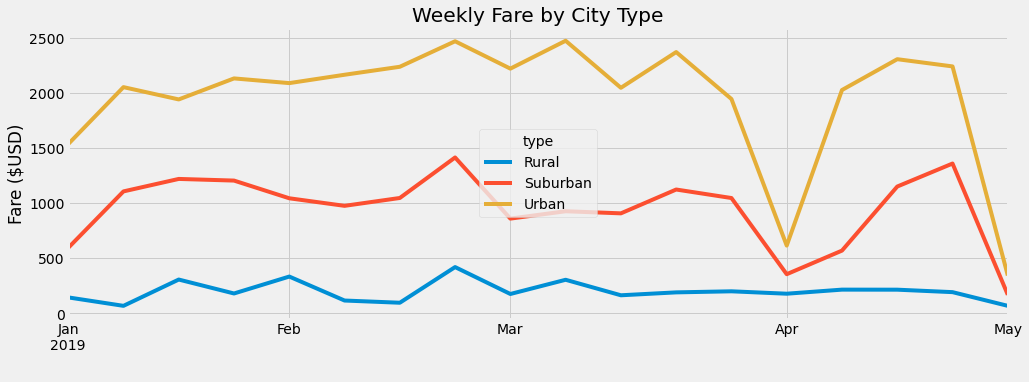

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fare_date_df.plot(figsize=(15,5))

plt.xlabel(' ')

plt.ylabel('Fare ($USD)')

plt.title('Weekly Fare by City Type')

plt.savefig('../analysis/pyber_challenge.png')

plt.show()
